![crypto](images/shutterstock_712597270-2.jpg)

In [28]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,7)
matplotlib.rcParams['font.size'] = 22

In [60]:
%set_env COINMARKETCAP_APIKEY=2bf10198-ed15-4d50-9ca8-715372b4a28d

env: COINMARKETCAP_APIKEY=2bf10198-ed15-4d50-9ca8-715372b4a28d


In [16]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

api_key = %env COINMARKETCAP_APIKEY

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': api_key,
}
session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)  
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

UsageError: Environment does not have key: COINMARKETCAP_APIKEY


In [3]:
import json
res = json.loads(response.text)

NameError: name 'response' is not defined

In [6]:
#with open("coinmarketcap.json", "w") as f:
#    json.dump(response.text, f)
#with open("coinmarketcap.json", "r") as f:
#    res = json.load(f)

#with open("coinmarketcap_data.json", "w") as f:
#    json.dump(res["data"], f)

In [19]:
with open("coinmarketcap_data.json", "r") as f:
    data = json.load(f)

Why not `pd.read_json("coinmarketcap_data.json")`?

In [22]:
normalized = pd.json_normalize(data)
df = pd.DataFrame.from_dict(normalized)

df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,8486,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.885411e+07,1.885411e+07,...,66.976001,1.189517e+12,45.3735,1.324903e+12,2021-10-25T17:54:02.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,4650,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum, bin...",NaN,1.180728e+08,1.180728e+08,...,87.784077,4.945416e+11,18.8640,4.945416e+11,2021-10-25T17:54:02.000Z,NaN,NaN,NaN,NaN,NaN
2,1839,Binance Coin,BNB,binance-coin,541,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.668011e+08,1.668011e+08,1.668011e+08,...,58.512319,8.091437e+10,3.0864,8.091437e+10,2021-10-25T17:53:08.000Z,NaN,NaN,NaN,NaN,NaN
3,2010,Cardano,ADA,cardano,307,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.292478e+10,3.331598e+10,...,73.595967,7.129524e+10,2.7266,9.744290e+10,2021-10-25T17:53:10.000Z,NaN,NaN,NaN,NaN,NaN
4,825,Tether,USDT,tether,18707,2015-02-25T00:00:00.000Z,"[payments, stablecoin, stablecoin-asset-backed...",NaN,6.957411e+10,7.135785e+10,...,-0.019686,6.959987e+10,2.6618,7.138426e+10,2021-10-25T17:53:08.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7


In [23]:
df[df['symbol']=="MIOTA"]

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
47,1720,IOTA,MIOTA,iota,61,2017-06-13T00:00:00.000Z,"[dag, medium-of-exchange, iot, sharing-economy...",2.779530e+09,2.779530e+09,2.779530e+09,...,58.143096,3.723347e+09,0.142,3.723347e+09,2021-10-25T17:54:07.000Z,NaN,NaN,NaN,NaN,NaN


### Top ten ranked cryptos

In [26]:
top_10 = df[df['cmc_rank']<=10]
top_10.set_index('name', inplace=True)

top_10.loc['Cardano'] # return Series vs DataFrame

,id,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
name,,,,,,,,,,,,,,,,,,,,,
Cardano,2010,ADA,cardano,307,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.292478e+10,3.331598e+10,NaN,...,73.595967,7.129524e+10,2.7266,9.744290e+10,2021-10-25T17:53:10.000Z,NaN,NaN,NaN,NaN,NaN


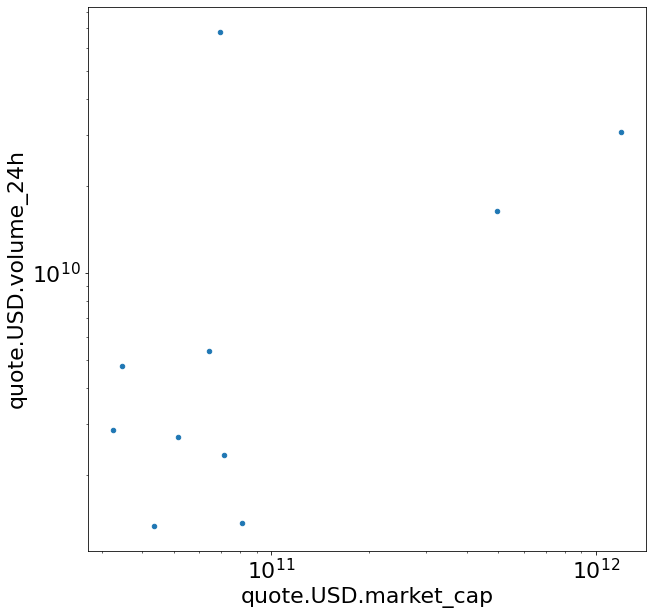

In [29]:
top_10.plot.scatter(x='quote.USD.market_cap', y='quote.USD.volume_24h', loglog=True, figsize=(10,10));

### Join price df with my example holding spreadsheet

In [30]:
have = pd.read_csv('example_crypto_holdings.csv')
have

,symbols,namn,navn,amount
0,ETH,ethereum,Ethereum,3.45
1,BCH,bitcoin-cash,Bitcoin Cash,2.10
2,BTG,bitcoin-gold,Bitcoin Gold,14.00
3,NEO,neo,NEO,19.00
4,XRB,nano,Nano,126.00
5,VEN,vechain,VeChain,425.00
6,GNT,golem,Golem,3495.00
7,XRP,ripple,Ripple,1234.00
8,MIOTA,iota,IOTA,1493.00


In [31]:
have.merge(df, left_on='navn', right_on="name")

,symbols,namn,navn,amount,id,name,symbol,slug,num_market_pairs,date_added,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,ETH,ethereum,Ethereum,3.45,1027,Ethereum,ETH,ethereum,4650,2015-08-07T00:00:00.000Z,...,87.784077,4.945416e+11,18.8640,4.945416e+11,2021-10-25T17:54:02.000Z,NaN,NaN,NaN,NaN,NaN
1,BCH,bitcoin-cash,Bitcoin Cash,2.10,1831,Bitcoin Cash,BCH,bitcoin-cash,540,2017-07-23T00:00:00.000Z,...,27.156179,1.173494e+10,0.4488,1.305120e+10,2021-10-25T17:53:08.000Z,NaN,NaN,NaN,NaN,NaN
2,BTG,bitcoin-gold,Bitcoin Gold,14.00,2083,Bitcoin Gold,BTG,bitcoin-gold,61,2017-10-23T00:00:00.000Z,...,54.041818,1.213200e+09,0.0463,1.454683e+09,2021-10-25T17:54:02.000Z,NaN,NaN,NaN,NaN,NaN
3,XRB,nano,Nano,126.00,1567,Nano,NANO,nano,53,2017-03-06T00:00:00.000Z,...,34.415505,7.266790e+08,0.0278,7.266790e+08,2021-10-25T17:54:06.000Z,NaN,NaN,NaN,NaN,NaN
4,VEN,vechain,VeChain,425.00,3077,VeChain,VET,vechain,147,2017-08-22T00:00:00.000Z,...,71.747241,8.986511e+09,0.3428,1.211595e+10,2021-10-25T17:54:02.000Z,NaN,NaN,NaN,NaN,NaN
5,GNT,golem,Golem,3495.00,1455,Golem,GLM,golem-network-tokens,49,2016-11-18T00:00:00.000Z,...,57.834660,5.425558e+08,0.0207,5.425558e+08,2021-10-25T17:54:05.000Z,1027.0,Ethereum,ETH,ethereum,0x7DD9c5Cba05E151C895FDe1CF355C9A1D5DA6429
6,MIOTA,iota,IOTA,1493.00,1720,IOTA,MIOTA,iota,61,2017-06-13T00:00:00.000Z,...,58.143096,3.723347e+09,0.1420,3.723347e+09,2021-10-25T17:54:07.000Z,NaN,NaN,NaN,NaN,NaN


In [32]:
has = have.join(df.set_index('name'), on='navn', how='left').set_index('id')
has['worth'] = has.amount*has["quote.USD.price"]

# Filter out coins with no trade volume
has = has[has['quote.USD.volume_24h'].notnull()]
has.set_index("symbol", inplace=True)

### Find USD/NOK exchange rate

In [53]:
url_exchange = 'https://api.fixer.io/latest?symbols=USD,NOK'
r = requests.get(url_exchange)
NOK_USD = r.json()['rates']['NOK']
has['worth_nok'] = has['worth']*NOK_USD
has[['price_usd', 'worth','worth_nok']], has['worth_nok'].sum()

KeyError: 'rates'

### Visualize my portfolio

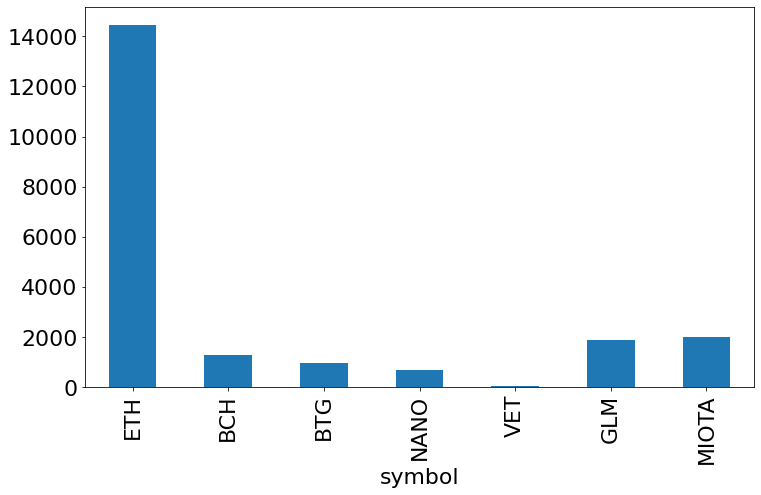

In [33]:
has['worth'].plot(kind='bar');

<AxesSubplot:xlabel='symbol'>

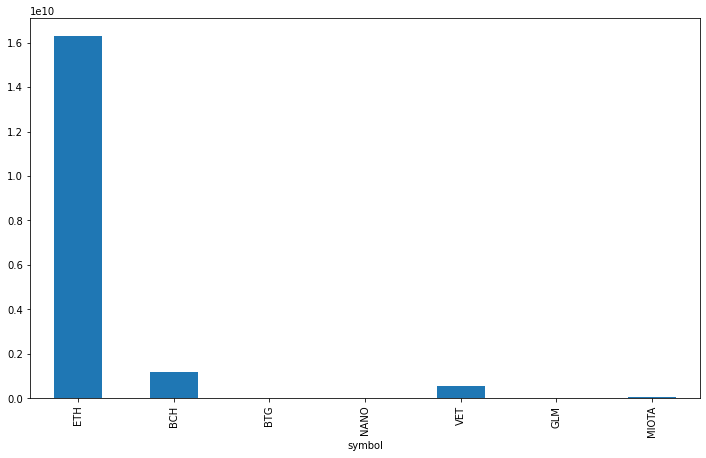

In [17]:
has['quote.USD.volume_24h'].plot(kind='bar') #logy=True

In [34]:
has[['percent_change_1h','percent_change_24h','percent_change_7d']].plot(kind='bar');

KeyError: "None of [Index(['percent_change_1h', 'percent_change_24h', 'percent_change_7d'], dtype='object')] are in the [columns]"

Change in portfolio 1 hour, 24 hours, 7 days?

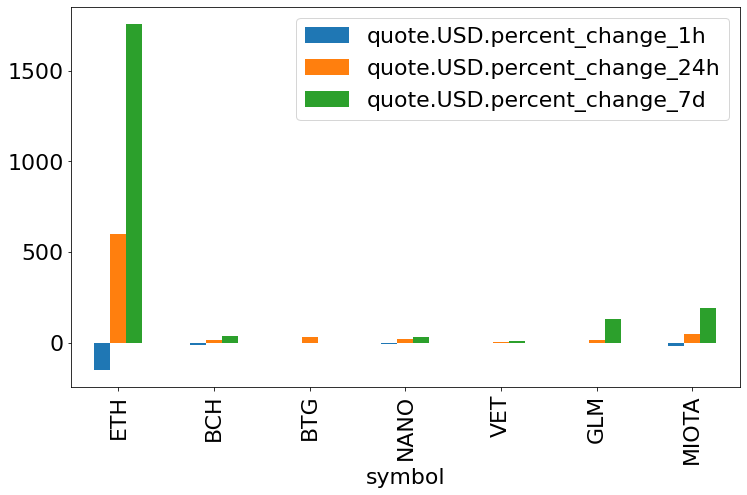

In [50]:
df1 = has[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d']].apply(lambda r: r*has.amount*has["quote.USD.price"])/100
df1.plot(kind='bar'), df1.sum();

What was portfolio 24 hours, 7 days ago?

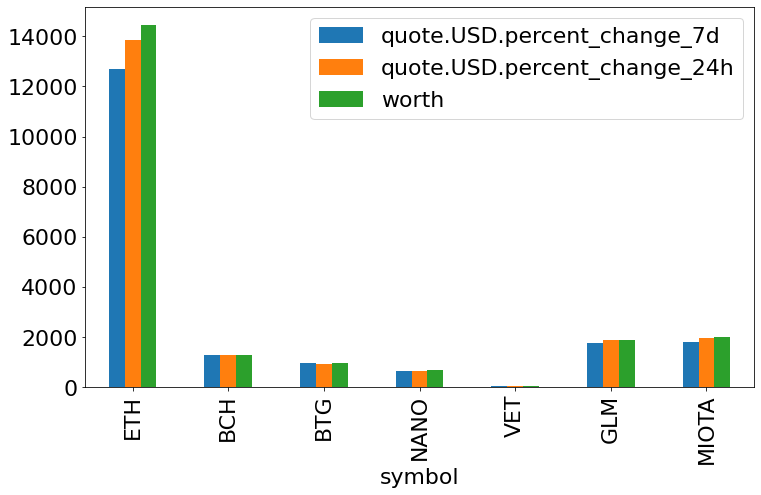

In [52]:
df2 = has[['quote.USD.percent_change_7d', 'quote.USD.percent_change_24h']].apply(lambda r:  r*(has.amount*has["quote.USD.price"]))/100

df2 = df2.apply(lambda r: has.worth-r, axis=0)
df2['worth'] = has.worth
df2.plot(kind='bar');

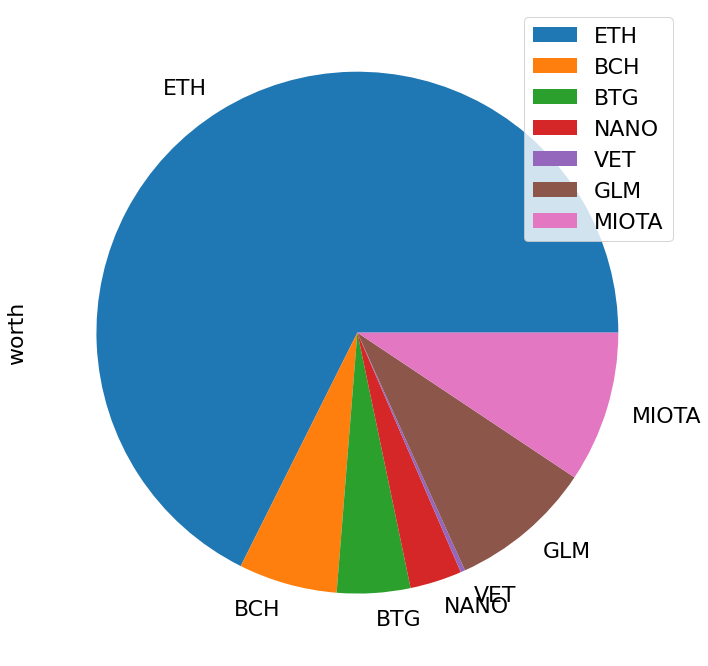

In [59]:
df2.plot.pie(y="worth", figsize=(12,12));